# Deep Computer Vision - Convolutional Neural Networks
In this guide, we will learn how to perform *image classification and object detection/recognition* using deep computer vision with something called a **convolutional neural network (CNN)**.

The goal of our CNN will be to classify and detect images or specific objects from within the image. We will be using image data as our features and a label for those images as our label or output.

We already know how neural networks work so we can skip through the basics and move right into explaining the following concepts.

- Image Data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

The major difference we are about to see in these types of neural networks are the layers that make them up.

## Image Data
So far we have dealt with pretty straight forward data that has 1 or 2 dimensions. Now we are about to deal with image data that is usually made up of 3 dimensions. These 3 dimensions are as follows:

- image height
- image width
- color channels

The only item in the list above you may not understand is **color channels**. The number of color channels represents the depth of an image and coorelates to the colours used in it. For example, an image with three channels is likely made up of rgb (red, green, blue) pixels. So for each pixel, we have three numeric values in the range 0-255 that define its color. For an image of color depth 1 we would likely have a greyscale image with one value defining each pixel, again in the range 0-255.

## Convolutional Neural Network
**Note**: I will use the term *convet* and convolutional network interchangably.

Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the *dense* layers we have seen previously. Their goal is to find patterns from within images that can be used to classify the image or parts of it. But this may sound familiar to what our densly connected neural network in the previous section was doing, well that's because it is.

The fundamental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detects patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all of the information and is only capable of analyzing the data in a global capacity. Our convolutional layer however will not be densly connected, this means it can detect local patterns using part of the input data to that layer.

For example, consider an asymmetry image of a cat, then the densly connected neural network would not be able to classify that image if we were to reflect the image vertically, which is still obviously a cat. That is because the densly connected neural network only learns the pattern globally, i.e. the location of the head is in upper left, as well as the eyes, etc. That is dense layer.

Meanwhile convolutional layer will look at specific parts of the image and detec whether it exists anywhere in the image, not just exists in a specific area.

### Multiple Convolutional Layers
In our models it is quite common to have more than one convolutional layer. Even the basic example we will use in this guide will be made up of 3 convolutional layers. These layers work together by increasing complexity and abstraction at each subsequent layer. The first layer might be responsible for picking up edges and short lines, while the second will take as input these lines and start forming shapes or polygons. Finally the last layer might take these shapes and determine which combinations make up a specific image.



## Feature Maps
You may see the term *feature map* throughout this tutorial. This term simply stands for a 3D tensor with two special axes (width and height) and one depth axis. Our convolutional layers take feature maps as their input and return a new feature map that represents the presence of specific filters from the previous feature map. These are what we call *response maps*.

## Layer Parameters
A convolutioinal layer is defined by two key parameters

#### Filters
A filter is a m $\times$ n pattern of pixels that we are looking for in an image. The number of filters in a convolutional layer represents how many patterns each layer is looking for and what the depth of our response map will be. If we are looking for 32 different patterns/filters then our output feature map (aka the response map) will have a depth of 32. Each one of the 32 layers of depth will be a matrix of some size containing values indicating if the filter was present at that location or not.

#### Sample Size
This isn't really the best term to describe this but each convolutional layer is going to examin n $\times$ m blocks of pixels in each image. Typically, we'll consider 3 $\times$ 3 or 5 $\times$ 5 blocks.

Our layers work by sliding and these filters of n $\times$ m pixels over every possible position in our image where we do 'dot product' between them and populating a new feature map/response map indicating whether the filter is present at each location.

## Stride, Borders and Padding
Our feature maps (3D) will be a list of matrices with smaller or equal size compared to the matrices from the previous layer. 

**Padding** is basically adding an extra row and column on each side of the images (matrices), so that when we filter with a particular sample size, the output map is the same size as our original input.

**Stride** is how many pixels we want to step over each time we slide our filter accross all the possible position in the entire image. For example, stride 1 means we slide our filter 1 pixel to the right each time, stride 2 means we slide our filter 2 pixels to the right each time. Obviously, higher stride results in a smaller image.

## Pooling Layer
We get into this layer by do **pooling** on the feature maps.

**Pooling**: An operation to take a specific values from a sample of the output feature map. Some basic poolings are min, max, average.

Maximum pooling operation is pretty much telling us about the maximum presence of a feature in that kind of local area. We really only care if the feature exists. 

## My Understanding of How Convolutional Neural Network Works
...

## Creating a Convnet
Now it is time to creaete our first convnet! This example is for the purpose of getting familiar with CNN architectures, we will talk about how to improves it's performance later.

*This tutorial is based on the following fuide from the TensorFlow documentation*: https://www.tensorflow.org/tutorials/images/cnn

## Dataset
The problem we will consider here is classifying in 10 different everyday objects. The dataset we will use is build into tensorflow and called the **CIFAR Image Dataset**. It contains 60,000 32 $\times$ 32 color images with 6000 images of each class.

The labels in this dataset are the following:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

We'll load the dataset and have a look at some of the images below.

In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
# LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 12s 0us/step


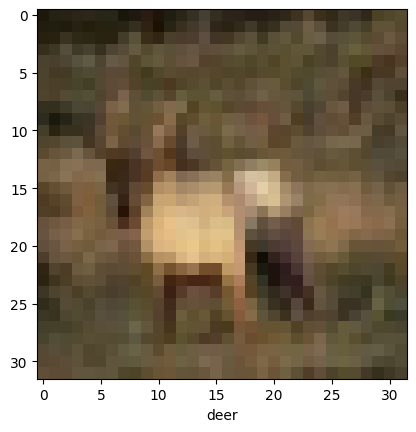

In [19]:
# Let's look at a one image
IMG_INDEX = 3 # change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## CNN Architecture
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few densely connected layers. The idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### Layer 1
The inputshape of our data will be 32, 32, 3 and we will preocess 32 filters of size 3 $\times$ 3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

#### Layer 2
This layer will perform the max pooling operation using 2 $\times$ 2 samples and a stride of 2.

#### Other Layers
The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [21]:
model.summary() # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

AftNotice that the depth of our image increases but the spacial dimensions reduce drastically.

## Adding Dense Layers
So far we have just completed the **convolutional base**. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

We can see that the flatten layer changes the shape of our data so that we can feed it to the 64 node dense layer, followed by the final output layer of 10 neurons (one for each class).

## Training
Now we will train and compile the model using the recommended hyper parameters from tensorflow.

*Note: This will take much longer than previous models!*

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5157 - accuracy: 0.4463 - val_loss: 1.3002 - val_accuracy: 0.5330
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1533 - accuracy: 0.5936 - val_loss: 1.0471 - val_accuracy: 0.6287
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9917 - accuracy: 0.6512 - val_loss: 1.0282 - val_accuracy: 0.6376
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8943 - accuracy: 0.6881 - val_loss: 0.9159 - val_accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8240 - accuracy: 0.7122 - val_loss: 0.8826 - val_accuracy: 0.6907
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7653 - accuracy: 0.7310 - val_loss: 0.8409 - val_accuracy: 0.7054
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7189 - accuracy: 0.7478 - val_loss: 0.8653 - val_ac

## Evaluating the Model
We can determine how well the model performed by looking at it's performance on the test data set.

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.8606 - accuracy: 0.7112 - 631ms/epoch - 2ms/step
0.7111999988555908


You should be getting an accuracy of about 70%. This isn't bad for a simple model like this but we'll dive into some better approaches for computer vision below

## Working with Small Datasets
In the situation where you don't have millions of images, it is difficult to train CNN fromscratch that performs very well. This is why we learn about a few techniques we can use to train CNN's on small datasets of just a few thousand images.

### Data Augmentation
To avoid overfitting and creates a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transformations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

Fortunately, keras can help us do this. Look at the code below to an example of data augmentation.

In [27]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

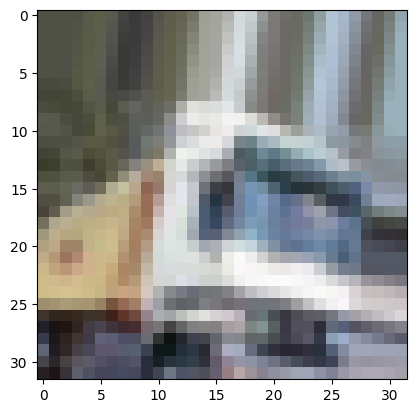

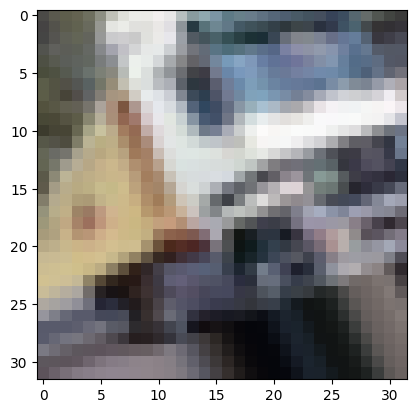

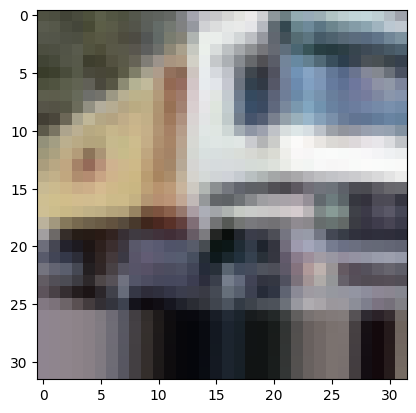

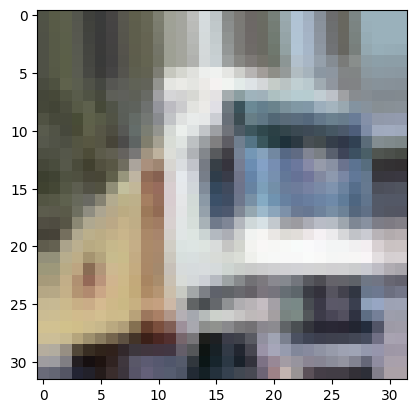

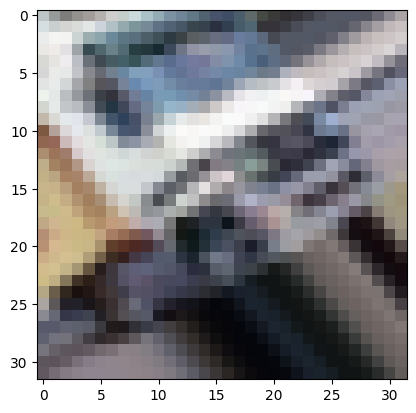

In [29]:
# creates a data generator object that transform images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# pick an image to transofrm
test_img = train_images[1]
img = image.img_to_array(test_img) # convert image to numpy array
img = img.reshape((1,) + img.shape) # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'): # this loops runs forever until we break, saving images to current directory
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4: # show 4 images
        break

plt.show()

### Pretrained Models
You would have noticed that the model above takes a few minutes to train in the NoteBook and only gives an accuracy of ~70%. This is okay but there is a way to improve on this.

In this section, we will talk about using a pretrained CNN as apart of our own custom network to improve the accuracy of our model. We know that CNN's alone (with no dense layers) don't do anything other than map the presence of features from our input. This means we can use a pretrained CNN, one trained on millions of images, as the start of our model. This will allow us to have a very good convolutional base before adding our own dense layered classifier at the end. In fact, by using this technique we can train a very good classifier for a relatively small dataset (< 10,000 images). This is because convnet already has a very good idea of what features to look for in an image and can find them very effectively. So, if we can determine the presence of features all the rest of the model needs to do is determine which combination of features makes a specific image.

### Fine Tuning
When we employ the technique defined above, we will often want to tweak the final layers in our convolutional base to work better for our specific problem. This involves not touching or retraining the earlier layers in our convolutional abse but only adjusting the final few. We do this because the first layers in our base are very good at extracting low level features like lines and edges, things that are similar for any kind of image. Where the later layers are better at picking up very specific features like shapes or even eyes. If we adjust the final layers, then we can look for only features relevant to our very specific problem.

## Using a Pretrained Model
In this section we will combine the techniques we learned above and use a pretrained model and fine tuning to classify images of dogs and cats using a fairly small dataset.

*This tutorial is based on the following guide from TensorFlow documentation*: https://www.tensorflow.org/tutorials/images/transfer_learning

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

## Dataset
We will load the cats_vs_dogs dataset from the module tensorflow_datasets.

This datasets contains (image, label) pairs where images have different dimensions and 3 color channels

In [31]:
import tensorflow_datasets as tfds

In [35]:
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

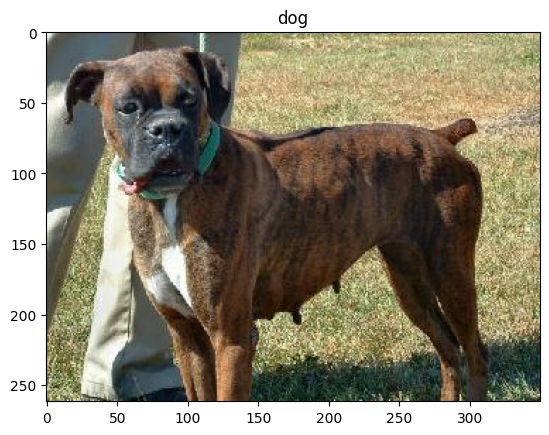

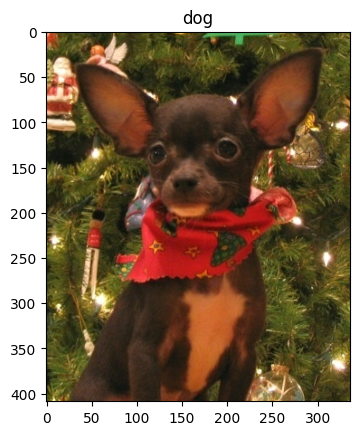

In [40]:
get_label_name = metadata.features['label'].int2str # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(2):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

## Data Preprocessing
Since the sizes of our images are all different we need to convert them all to the same size. We can create a funciton that will do that for us below.

In [46]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
    """
    returns an image that is reshapes to IMG_SIZE
    """
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

Now, we can apply this function to all our images using map.

In [47]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Let's have a look at our images now.

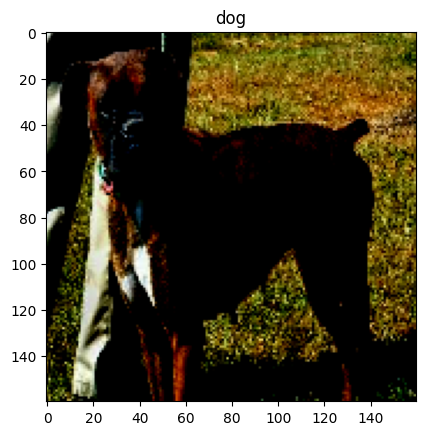

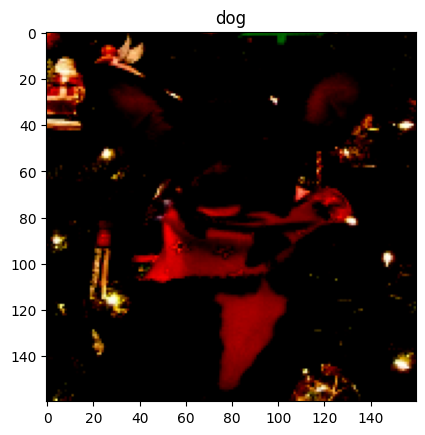

In [48]:
for image, label in train.take(2):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))
    plt.show()

Finally, we will shuffle and batch the images.

In [49]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

Now if we look at the shape of an original image vs the new image we will see it has been changed.

In [50]:
for img, label in raw_train.take(2):
    print("Original shape:", img.shape)

for img, label in train.take(2):
    print("New shape:", img.shape)

Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


## Picking a Pretrained Model
The model we are going to use as the convolutional base for our model is the MobileNet V2 developed at Google. This model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only its convolutional base. So when we load in the model, we'll specify that we don't want to load the top (classification) layer. We'll tell the model what input shape to expect and to use the predetermined weights from *imagenet* (Googles dataset).

In [52]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the mae model from the pre-trained model MovileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [54]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

At this point this *base_model* will simply output a shape (32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of different filters/features.

In [55]:
for image, _ in train_batches.take(1):
    pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


## Freezing the Base
The term **freezing** refers to disabling the training property of a layer. It simply means we won't make any changes to the weights of any layers that are frozen during training. This is important as we don't want to change the convolutional base that already has learned weights.

In [56]:
base_model.trainable = False

In [57]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

## Adding our Classifier
Now that we have our base layer setup we can add the classifier. Instead of flattening the feature map of the base layer, we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature mapand return to us a single 1280 element vector per filter.

In [59]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

Finally, we will add the prediction layer that will be a single dense neuron. We can do this because we only have two classes to predict for.

In [61]:
prediction_layer = keras.layers.Dense(1)

Now, we will combine these layers together in a model.

In [62]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


## Training the Model
Now, we will train and compile the model. We will use a very smmall learning rate to ensure that the model does not have any major changes made to it.

In [64]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps = 20

loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 3s 103ms/step - loss: 0.7794 - accuracy: 0.4922


In [66]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 66s 111ms/step - loss: 0.0703 - accuracy: 0.9735 - val_loss: 0.0515 - val_accuracy: 0.9811
Epoch 2/3
582/582 [==============================] - 66s 113ms/step - loss: 0.0439 - accuracy: 0.9846 - val_loss: 0.0474 - val_accuracy: 0.9845
Epoch 3/3
582/582 [==============================] - 65s 112ms/step - loss: 0.0396 - accuracy: 0.9857 - val_loss: 0.0491 - val_accuracy: 0.9815
[0.973508894443512, 0.9845781922340393, 0.9856528639793396]


In [68]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

/Users/louischaristias/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Object Detection
There is an API for TensorFlow that does object detection. There is also module named *facial recognition*, not part of TensorFlow but uses some kind of CNN to do facial detection and recognition.

More resources: